# Petrophysical Data Visualization

This is a Jupyter Notebook to quickly load, check, process, and visualize geophysical well logs and petrophysical data. 

## About the Data

A dataset with geomechanical parameters, such as Young's modulus, Bulk modulus, Shear modulus, and Poisson's ratio, from 41 wells of the main geothermal reservoirs in the Netherlands is available for download through the _Nederlandse Olie- en Gasportaal_ (NLOG):

https://www.nlog.nl/nieuws/publicatie-van-geomechanische-data-van-de-belangrijkste-geothermische-reservoirs. 

__Reference__: 

[Hunfeld et al., 2021](https://www.nlog.nl/sites/default/files/2021-12/data_selection_and_methods.pdf), _Geomechanical parameters derived from compressional and shear sonic logs for main geothermal targets in The Netherlands_. TNO Notitie. .

## Well Log Data Exploration 

Some examples are given in this notebook. You can adjust things to match your specific project. 

The source data can be stored in LAS and CSV files but other formats can be added if needed. 

There are several predefined graphs to choose from, but new graphs can be added if needed. 

The first step we need to do is import the different modules:

In [1]:
from petrophys.visualization import visualize                                                   # Custom module to generate graphs
from petrophys.data import utils                                                                # Custom module to manipulate data
import lasio                                                                                    # Third party module to read LAS files
import pandas as pd                                                                             # Standard module to read different file formats 

Next we can read the data we need. Be sure the data is accessible from the notebook. 

Below is the code to read the data

In [2]:
capelle_data = lasio.read('../data/raw/logs/2571_cap01_1985_comp.las')                          # Read lasfile
core_measurements = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')                    # Reading the .csv file containinig experimental petrophysical measurements 
core_properties= pd.read_csv('../data/raw/cores/CAP-01_cores.csv')                              # Reading the .csv file containing depths and properties measured on cores 
geomech_par = pd.read_excel('../references/appendix_b_summary_data_sheet.xlsx', sheet_name=1)   # Read geomechanical parameters

Next we can extract the data we need and store it in variables:

In [3]:
cm_converted = utils.convert_value_to_nan(core_measurements, value='-')                         # Converting '-' into Nan and removing outliers
cm_converted = utils.convert_value_to_nan(core_measurements, value='0.66')                      # Converting '-' into Nan and removing outliers

density = utils.get_values(cm_converted, 'Korreldichtheid (g/cm³)', mini=True, maxi=True)       # Extract the density values from the source data km2
porosity = utils.get_values(cm_converted, 'Porositeit (%)', mini=True, maxi=True)               # Extract the porosity values from the source data km2
permeability = utils.get_values(cm_converted, 'hor. Perm (mD)', mini=True, maxi=True)           # Extract the permeability values from the source data km2
depth = utils.get_values(core_measurements, 'deipte (m)')                                       # Extract the depth values from the source data km2

lithology_list = [(k) for k in geomech_par['Lithology_type'].unique()]                          # Extract the different lithology types
tcss = utils.get_values(geomech_par, 'TVCSS_Top')                                               # Extract the tcss data from the geomech_par file
youngs_modulus = utils.get_values(geomech_par, 'Young’s Modulus E (GPa)')                       # Extract the young's modulus data from the geomech_par file
lithology_type = geomech_par['Lithology_type'].astype('category').cat.codes                     # Extract the lithology type data from the geomech_par file

Next we create a list with data for the well curves.

In [4]:
GRAPH1 = [0.5, 'c', 2, '', 'GR (API)', capelle_data['GR'], 'DEPTH (m)', capelle_data['DEPT'], None, None, False]
GRAPH2 = [0.5, 'r', 0, 'DCTO', 'DT (m/s)', capelle_data['DT']/0.3048, '', capelle_data['DEPT'], None, None, False]
GRAPH3 = [0.5, 'b', 0, '', 'RHOB (g/cm3', capelle_data['RHOB'], '', capelle_data['DEPT'], None, None, False]
GRAPH4 = [0.5, 'g', 0, '', 'DRHO (g/cm3)', capelle_data['DRHO'], '', capelle_data['DEPT'], None, None, False]
GRAPH5 = [0.5, 'k', 0, '', 'NPHI (v/v)', capelle_data['NPHI'], '', capelle_data['DEPT'], None, None, False]
GRAPH = [[GRAPH1], [GRAPH2], [GRAPH3], [GRAPH4], [GRAPH5]]

The last step is that we use the data and variables to generate graphs

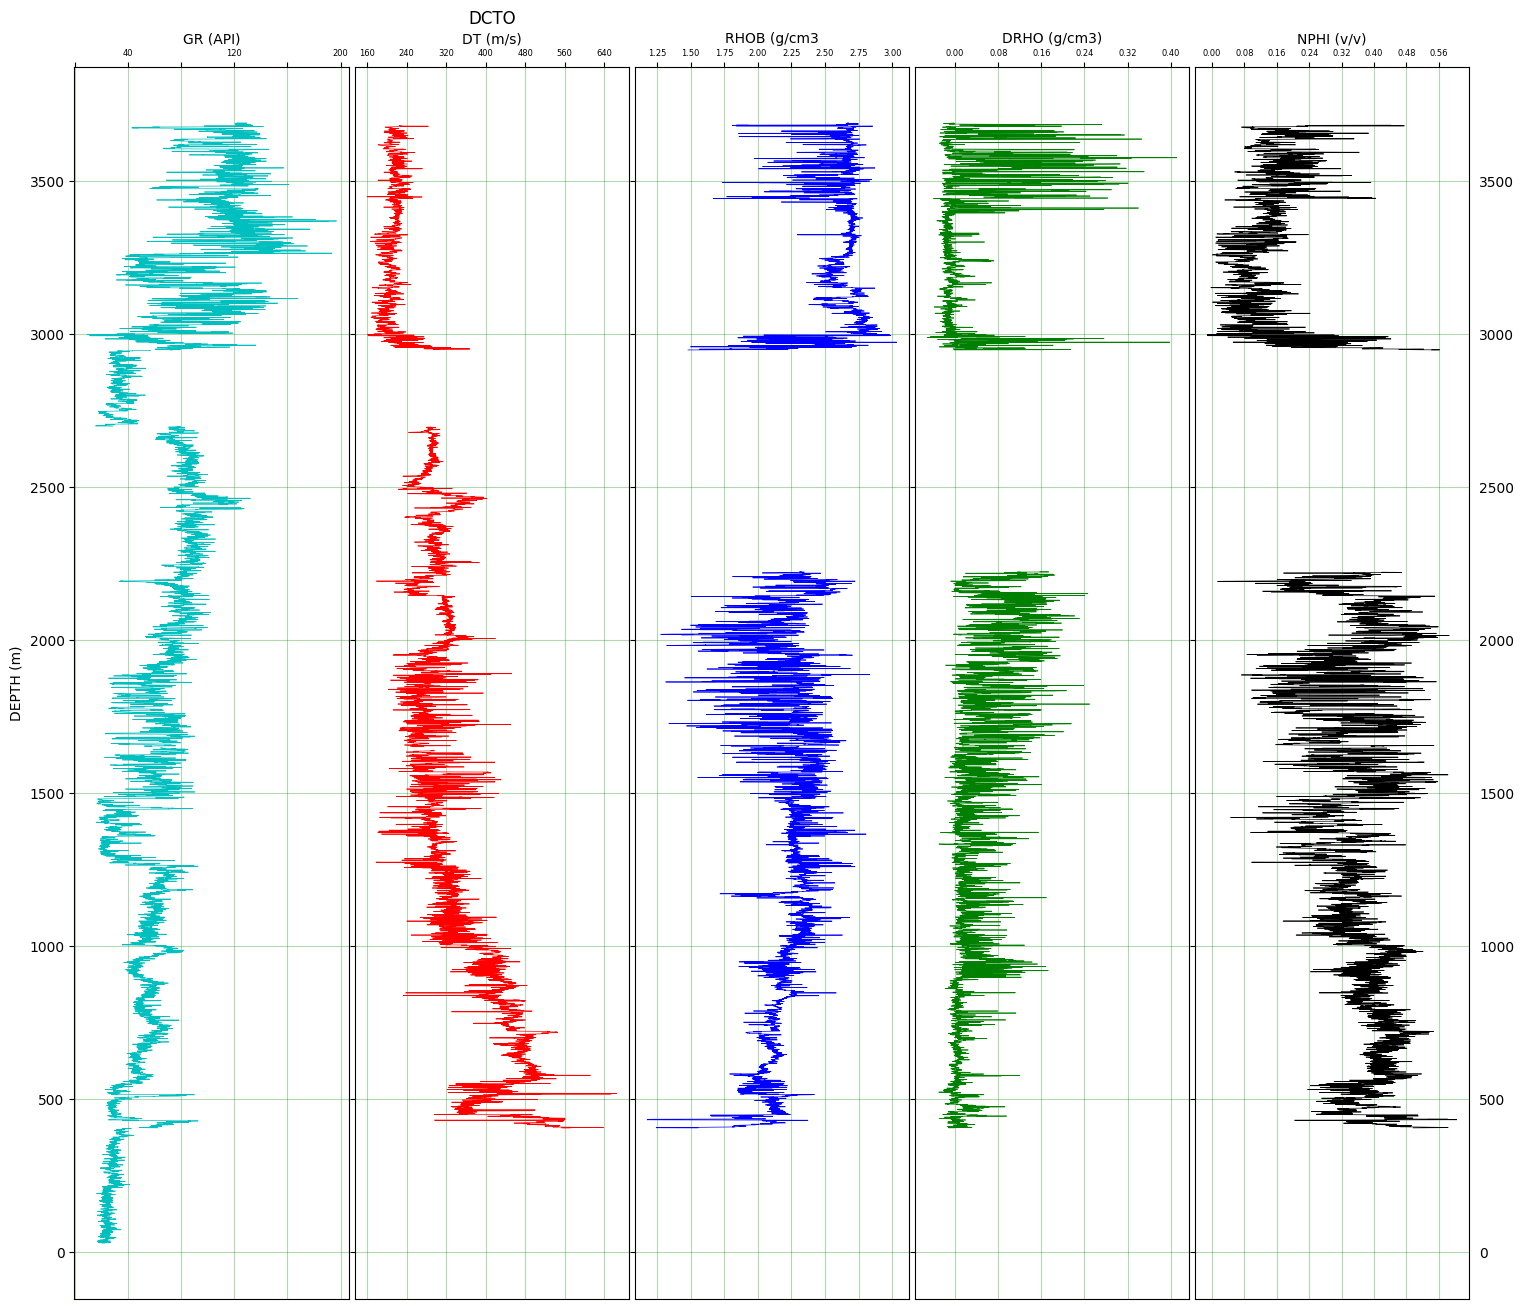

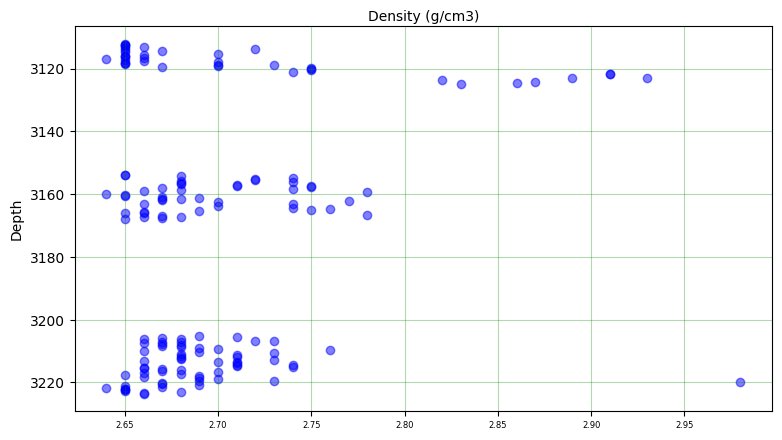

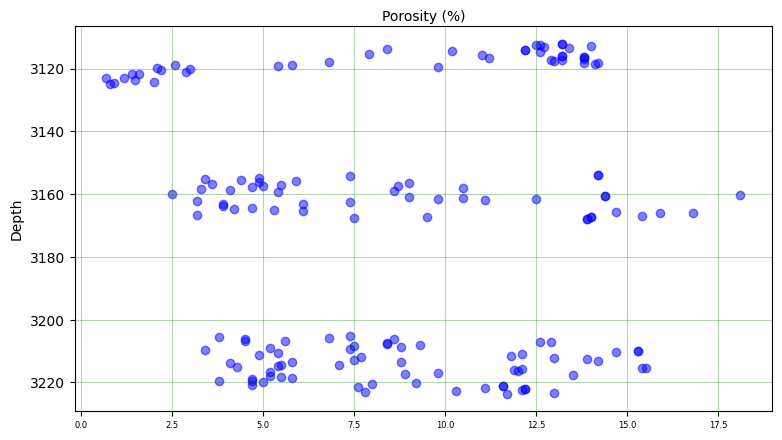

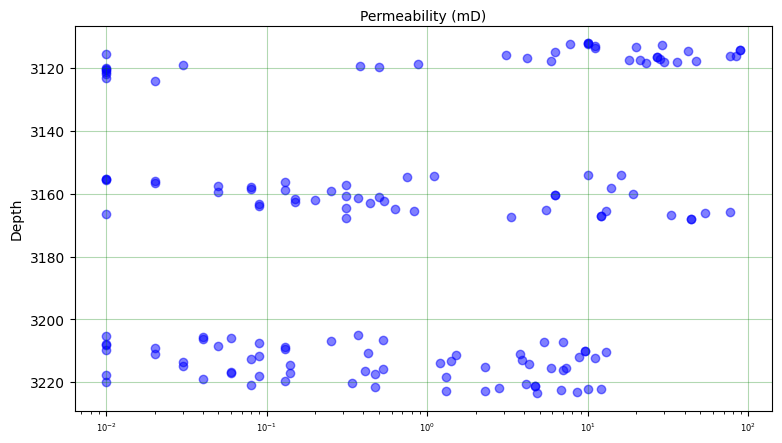

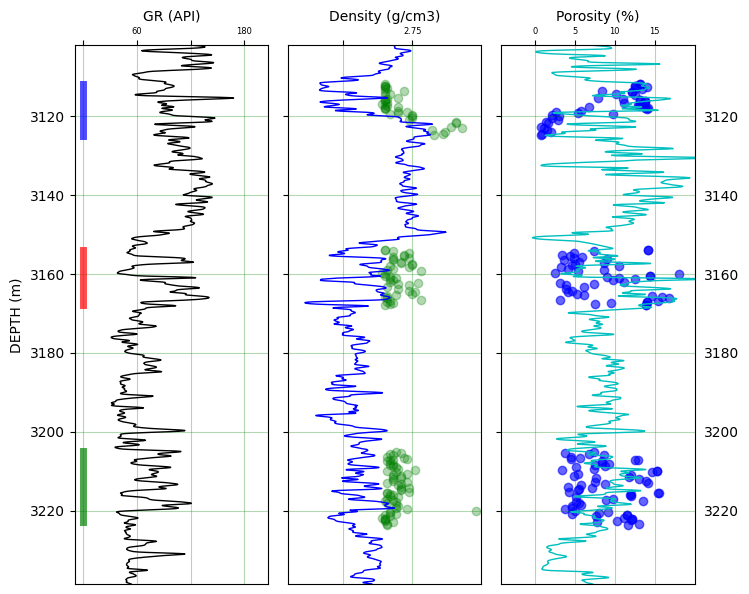

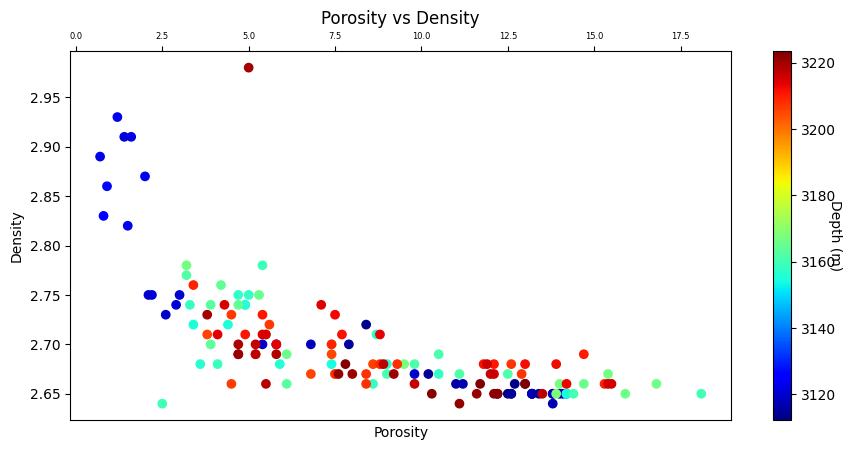

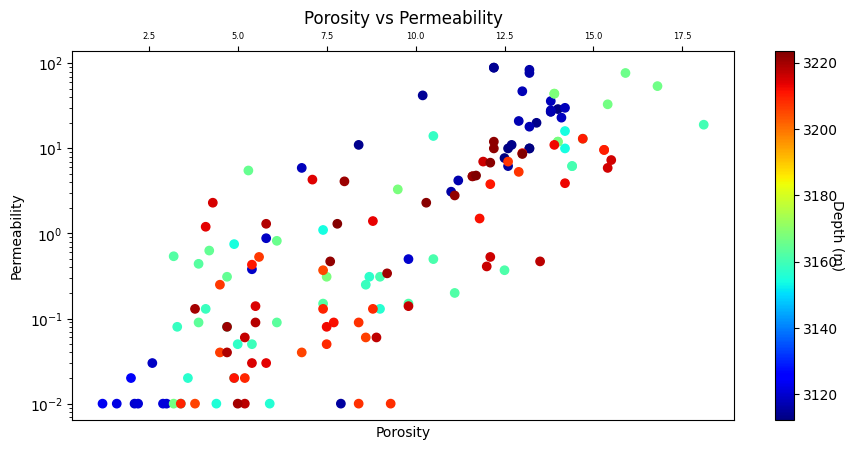

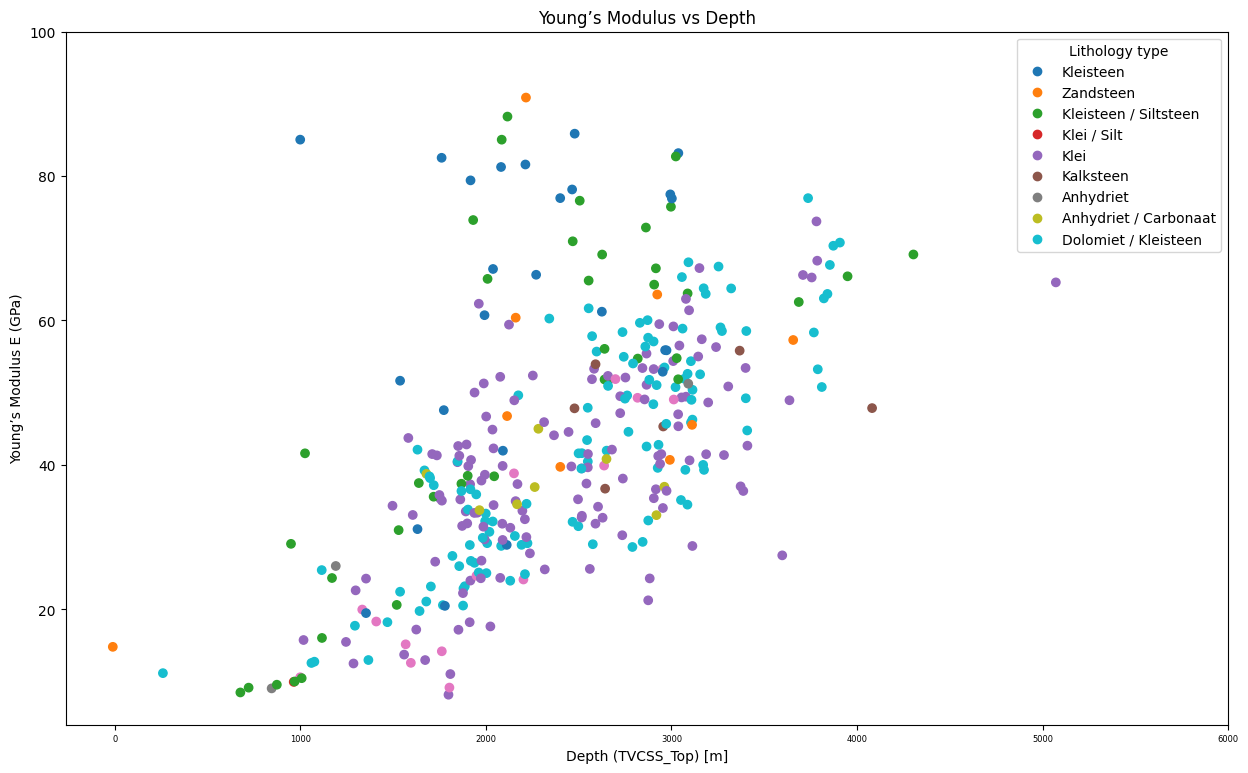

In [5]:
visualize.well_curve2(GRAPH)
visualize.depth_intervals_cores(density, depth, 'Density (g/cm3)', 'Depth')
visualize.depth_intervals_cores(porosity, depth, 'Porosity (%)', 'Depth')
visualize.depth_intervals_cores(permeability, depth, 'Permeability (mD)', 'Depth', xscale='log')
visualize.petro_measure_curve(capelle_data, depth, density, porosity, core_properties)
visualize.depth_intervals_porosity(porosity, density, depth, xlabel='Porosity', ylabel='Density', clabel='Depth (m)', graphlabel='Porosity vs Density')
visualize.depth_intervals_porosity(porosity, permeability, depth, xlabel='Porosity', ylabel='Permeability', clabel='Depth (m)', graphlabel='Porosity vs Permeability', yscale='log')
visualize.youngs_modulus_vs_depth(tcss, youngs_modulus, lithology_type, xlabel='Depth (TVCSS_Top) [m]', ylabel='Young’s Modulus E (GPa)', clabel='Lithology type', graphlabel='Young’s Modulus vs Depth',legend_list=lithology_list)
